In [2]:
import os

# Check what files are inside the dataset folder
print(os.listdir(path))


['breast-cancer.csv']



--- RBF Kernel ---
Accuracy: 0.9473684210526315

Confusion Matrix:
 [[71  0]
 [ 6 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


--- Decision Boundary Visualization (2D) ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


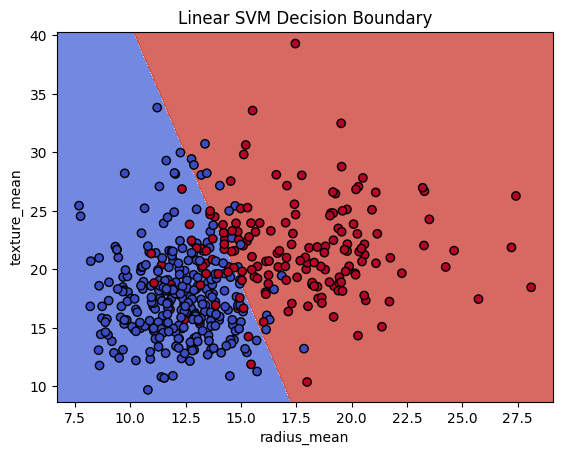

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


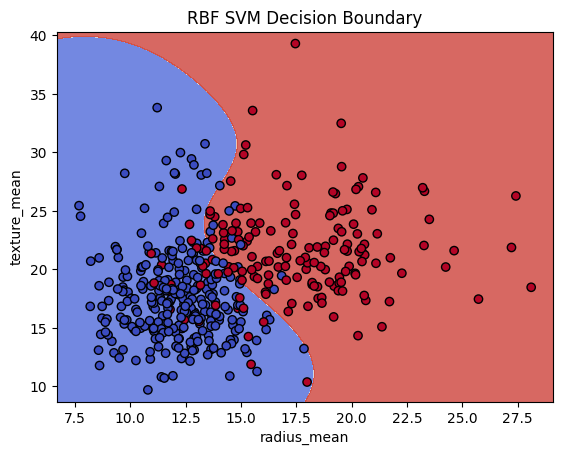

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score

# Step 9: Train SVM with RBF kernel
model_rbf = SVC(kernel="rbf", random_state=42)
model_rbf.fit(X_train, y_train)

# Step 10: Predictions with RBF kernel
y_pred_rbf = model_rbf.predict(X_test)

# Step 11: Evaluation with RBF kernel
print("\n--- RBF Kernel ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

# Step 12: Visualize decision boundary (using a subset of features for 2D)
# Selecting the first two features for visualization
X_vis = X[["radius_mean", "texture_mean"]]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

# Train a linear SVM on the 2D data
model_vis_linear = SVC(kernel="linear", random_state=42)
model_vis_linear.fit(X_vis_train, y_vis_train)

# Train an RBF SVM on the 2D data
model_vis_rbf = SVC(kernel="rbf", random_state=42)
model_vis_rbf.fit(X_vis_train, y_vis_train)


def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(
        X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k"
    )
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    plt.show()


print("\n--- Decision Boundary Visualization (2D) ---")
plot_decision_boundary(
    X_vis_train, y_vis_train, model_vis_linear, "Linear SVM Decision Boundary"
)
plot_decision_boundary(
    X_vis_train, y_vis_train, model_vis_rbf, "RBF SVM Decision Boundary"
)


# Step 13: Hyperparameter Tuning (Grid Search)
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf"]}

grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning (Grid Search) ---")
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Step 14: Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n--- Evaluation of Best Model on Test Set ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Step 15: Cross-validation
print("\n--- Cross-validation ---")
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())